
### Examining racial discrimination in the US job market

#### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

#### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes.

#### Exercise
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Discuss statistical significance.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
data.head(2)

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1,0,1,0,0,0,0,0,0,
1,b,1,3,3,6,0,1,1,0,316,...,1,0,1,0,0,0,0,0,0,


In [5]:
# number of callbacks for balck-sounding names
len(data[data.race=='b'].call)

2435

In [36]:
count = 0
sampl = pd.DataFrame()

# iterate random sampling with replacement
while count < 100:
    # create a sample size of 100 from the population, then calculate the mean
    sampl.loc[count, 'call_b'] = data[data.race == 'b'].call.sample(100, replace=True).mean()
    sampl.loc[count, 'call_w'] = data[data.race == 'w'].call.sample(100, replace=True).mean()
    count += 1

# preview the dataframe
sampl.head(2)

,call_b,call_w
0,0.07,0.05
1,0.06,0.15


##Q1: What test is appropriate for this problem? Does CLT apply?
Since the 'call' column contains ordinal values 0 and 1, we create a random sample with replacement with sample size of 100 to calculate the mean for each group: black-sounding and white-sounding. The sampling process is re-iterated 100 times to get 100 means, and is plotted on a histogram.

A Z-Test will be appropriate for this problem. The problem is to compare two means: number of call interviews from black-sounding names vs white-sounding names. We have a sample size of 100, so the Z-test is more appropriate compared to T-test because our current sample size is more than 30, and the distribution is normal.

In this case, the CLT applies because the histogram for black-sounding names and white-sounding names look normally distributed at a moderate degree. The sample is randomly selected with replacement also fulfills the CLT requirements.

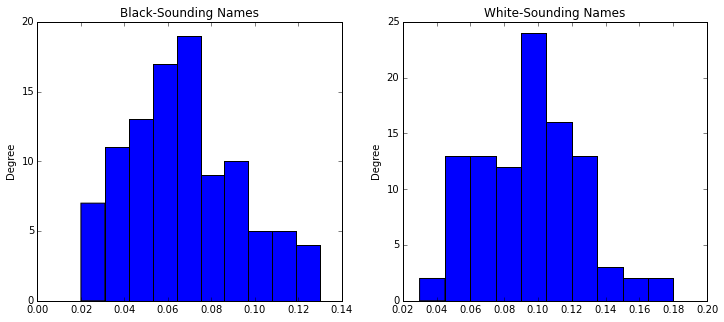

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sampl.call_b.plot(kind='hist', ax=ax[0], title='Black-Sounding Names')
sampl.call_w.plot(kind='hist', ax=ax[1], title='White-Sounding Names')

##Q2: What are the null and alternate hypotheses?
H0: There is no difference in getting a call interview from black-sounding resumes to white-sounding name resumes

Ha: There is difference in getting a call interview from black-sounding resumes to white-sounding name resumes

##Q3: Compute margin of error, confidence interval, and p-value.
We calculated the margin of error to be 0.0457

The intepretation of confidence interval: we are 95% confident that white-sounding name resumes have a difference between -0.01 and 0.07 more interview calls compared to black-sounding name resumes. Therefore, we reject the null hypothesis that there is no difference in getting a call interview from black-sounding name resumes to white-sounding name resumes.

In terms of practicality, 0.07 is actually a tiny difference. Therefore it is not displaying solid evidence that there is racial discrimination in the US job market.

In [53]:
import statsmodels.stats.weightstats as sm
import math as ma

# estimate difference between black-sounding and white-sounding means at 95% confidence level
# formula from coursera: Unit 4, Part 1, 4mins 10sec (point estimate +- margin of error)

x1m = sampl.call_w.mean()
x2m = sampl.call_b.mean()
x1std = sampl.call_w.std()
x2std = sampl.call_b.std()
n1 = float(len(sampl.call_w))  # we already know the sample size is 100, but let's just get the value this way
n2 = float(len(sampl.call_b))

std_diff = ma.sqrt((x1std / n1) + (x2std / n2))
moe      = 1.96 * std_diff

lf_interval = (x1m - x2m) - moe
ri_interval = (x1m - x2m) + moe

print "margin of error = " + str(moe)
print "confidence interval ("+str(lf_interval)+", "+str(ri_interval)+")"
print sm.ztest(sampl.call_b, sampl.call_w) # calculate p-value

margin of error = 0.0457893348447
confidence interval (-0.0185893350428, 0.0729893346465)
(-7.0152194535340096, 2.2958830718265227e-12)


##Q4: Discuss statistical significance.
Given that the p-value is 0.000, there is statistical signifcance that the mean of getting a call interview from a black-sounding name resume is different than the mean of getting call interview from a white-sounding name resume.